In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [ ]:
import makeAmoebasX
import amoeba2Dxx
import amoebaSegments2x
import draw_matplotlib
import render

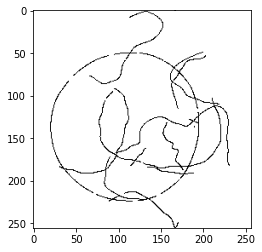

In [56]:
# Defaults are given in amoeba_struct (like in Matlab). Image with target:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'large') 

# A single temporary buf. to reuse for all images
buf = np.zeros((amoeba_struct.image_rect_size, amoeba_struct.image_rect_size), dtype=np.uint8)

# Set these as desired:
which_target=101
which_clutter=100

# Generate and render (255 for segs, 0 for background)
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, which_target, which_clutter )
img=render.render_amoeba(buf, xs,ys)

#Draw (invert for white on black)
plt.imshow(255-img, cmap='bone')

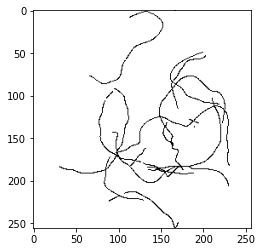

In [55]:
# Non-target image. Has 4 distractors and no target.
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'large') 

which_clutter=100
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, which_clutter )
img=render.render_amoeba(buf, xs,ys)
plt.imshow(255-img, cmap='bone')